# IBM Coursera Capstone

## Introduction

Moving to work and live in a new city, one often wants to find a place that would correspond to the usual corner of life in the current city. I mean urban infrastructure and services.

To solve this problem, you can use Foursqure data by dividing the city you know into clusters and applying this clustering to the city you are going to move to.

Thus, you can get an idea of the most suitable areas for you.

I will solve this problem using the example of two capitals of my native country of Russia: Moscow and St. Petersburg. I live in Moscow and will try to find areas that suit my preferences in St. Petersburg.

In [339]:
# pip install lxml

In [66]:
import pandas as pd
import numpy as np
import re

In [67]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Data

Make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

Start with reading Moscow Neighbourhood names from wikipedia.

In [3]:
msk= pd.read_html('https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B')[0]
msk.drop(msk.columns[[0,1,2,6,7,8,9,10]], axis=1, inplace=True)
msk.columns =['Borough', 'Neighbourhood', 'Distict']

In [68]:
msk.head(3)

Borough  Neighbourhood Distict        lat        lon
0  Академический  Академический    ЮЗАО  55.692091  37.589259
1   Алексеевский   Алексеевский    СВАО  55.821456  37.643961
2   Алтуфьевский   Алтуфьевский    СВАО  55.880255  37.581635

Then read Boroughs and Neiborhoods of Saint-Peterburg.

In [6]:
spb_neig_raw= pd.read_html('https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%9C%D1%83%D0%BD%D0%B8%D1%86%D0%B8%D0%BF%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0')[1][1][0]
spb_neig= spb_neig_raw
spb_neig= re.sub('№ ', '№', spb_neig)
spb_neig= re.sub('[¹³²⁴⁵⁷⁸1234567890№]', '', spb_neig)
spb_neig= re.sub('округ', '', spb_neig)
spb_neig= re.sub('остров', '', spb_neig)
spb_neig= re.sub('речка', '', spb_neig)
spb_neig= re.sub('аэродром', '', spb_neig)
spb_neig= re.sub('застава', '', spb_neig)
spb_neig= re.sub('Остров', '', spb_neig)
spb_neig= re.sub('Озеро', '', spb_neig) 
spb_neig= re.sub('меридиан', '', spb_neig) 
spb_neig= re.sub('ворота', '', spb_neig) 
    
spb_neig= re.sub('  ', ' ', spb_neig)
s = pd.Series(spb_neig)
spb_neig= s.str.split(expand=True).transpose().rename(columns={0:'Neighbourhood'}, errors="raise")
spb_bor = pd.read_html('https://ru.wikipedia.org/wiki/%D0%90%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%82%D0%B5%D1%80%D1%80%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0')[0]
spb_bor.drop(spb_bor.columns[[0,2,3,4]], axis=1, inplace=True)
spb_bor.rename(columns={"район": "Borough"}, inplace=True)

spb_neig_raw

'Автово5 Адмиралтейский округ1 Академическое4 Аптекарский остров13 Балканский17 Большая Охта7 Васильевский2 Введенский13 Владимирский округ18 Волковское17 Гавань2 Гагаринское11 Георгиевский17 Горелово8 Гражданка4 Дачное5 Дворцовый округ18 Екатерингофский1 Звёздное11 Ивановский12 Измайловское1 Княжево5 Коломна1 Коломяги15 Комендантский аэродром15 Константиновское8 Красненькая речка5 Кронверкское13 Купчино17 Ланское15 Лахта-Ольгино15 Лиговка-Ямская18 Литейный округ18 Малая Охта7 Морские ворота5 Морской2 Московская застава11 Нарвский округ5 Народный12 Невская застава12 Невский округ12 Новоизмайловское11 Обуховский12 Озеро Долгое15 Оккервиль12 округ Петровский13 Остров Декабристов2 Пискарёвка4 Полюстрово7 Пороховые7 Посадский13 Правобережный12 Прометей4 Пулковский меридиан11 Ржевка7 Рыбацкое12 Сампсониевское3 Светлановское3 Северный4 Семёновский1 Сенной округ1 Сергиевское3 Смольнинское18 Сосновая Поляна8 Сосновское3 Ульянка5 Урицк8 Финляндский округ4 Чкаловское13 Шувалово-Озерки3 Юго-Запад

In [7]:
spb_neig.head(3)

Neighbourhood
0          Автово
1  Адмиралтейский
2   Академическое

Let's create a function that allow us to get Neighbourhood coordinates based on a string with the name.

In [8]:
def getCoordByRegionName(regionName):
    url = "http://nominatim.openstreetmap.org/search?" + 'q=' + regionName + '&polygon_geojson=1&format=jsonv2'
    
    results = requests.get(url).json()
#    print(results)
    r= pd.DataFrame.from_dict( {'lat' :[None] ,'lon' :[None]})
        
    try:
        r= pd.DataFrame([[results[0]['lat'], results[0]['lon']]])
    except IndexError:
        print("Oops!  That was an error with: "+regionName)
       
    return( r )
#getCoordByRegionName('округ Клёновское, поселение, Москва')

Then get coordinates of Moscow and Saint-Peterburg Neighbourhood.

In [9]:
msk_c = pd.DataFrame.from_dict( {'lat' :[] ,'lon' :[]})

for index, x in msk.iterrows():
    coord = getCoordByRegionName('округ ' + x['Neighbourhood'] + ' , Москва')
    msk_c= msk_c.append({'lat' :coord.iloc[0][0] ,'lon' : coord.iloc[0][1]} , ignore_index=True)

Oops!  That was an error with: округ Вороновское, поселение , Москва
Oops!  That was an error with: округ Клёновское, поселение , Москва
Oops!  That was an error with: округ Кокошкино, поселение , Москва
Oops!  That was an error with: округ Краснопахорское, поселение , Москва
Oops!  That was an error with: округ Михайлово-Ярцевское, поселение , Москва
Oops!  That was an error with: округ Московский, поселение , Москва
Oops!  That was an error with: округ Мосрентген, поселение , Москва
Oops!  That was an error with: округ Первомайское, поселение , Москва
Oops!  That was an error with: округ Роговское, поселение , Москва
Oops!  That was an error with: округ Рязановское, поселение , Москва
Oops!  That was an error with: округ Троицк, городской округ , Москва
Oops!  That was an error with: округ Щербинка, городской округ , Москва


In [10]:
msk= msk.join(msk_c)
msk= msk[msk.lat.notnull()]

In [11]:
msk['lat']= msk['lat'].astype(float)
msk['lon']= msk['lon'].astype(float)
msk.head(3)

Borough  Neighbourhood Distict        lat        lon
0  Академический  Академический    ЮЗАО  55.692091  37.589259
1   Алексеевский   Алексеевский    СВАО  55.821456  37.643961
2   Алтуфьевский   Алтуфьевский    СВАО  55.880255  37.581635

In [12]:
spb_c= pd.DataFrame.from_dict( {'lat' :[] ,'lon' :[]})

for index, x in spb_neig.iterrows():
    coord = getCoordByRegionName('округ ' + x['Neighbourhood'] + ' , Санкт-Петербург')
    spb_c= spb_c.append({'lat' :coord.iloc[0][0] ,'lon' : coord.iloc[0][1]} , ignore_index=True)

Oops!  That was an error with: округ Аптекарский , Санкт-Петербург
Oops!  That was an error with: округ Красненькая , Санкт-Петербург
Oops!  That was an error with: округ Морские , Санкт-Петербург
Oops!  That was an error with: округ Невская , Санкт-Петербург
Oops!  That was an error with: округ Декабристов , Санкт-Петербург
Oops!  That was an error with: округ Сенной , Санкт-Петербург
Oops!  That was an error with: округ Сосновая , Санкт-Петербург
Oops!  That was an error with: округ Поляна , Санкт-Петербург


In [13]:
spb_neig= spb_neig.join(spb_c)
spb_neig= spb_neig[spb_neig.lat.notnull()]

In [14]:
spb_neig['lat']= spb_neig['lat'].astype(float)
spb_neig['lon']= spb_neig['lon'].astype(float)
spb_neig.head(3)

Neighbourhood        lat        lon
0          Автово  59.858637  30.278818
1  Адмиралтейский  59.931054  30.296798
2   Академическое  60.011526  30.394661

Let's visualise results on the folium maps

In [15]:
# Matplotlib and associated plotting modules
#!conda install -c conda-forge matplotlib --yes
import matplotlib.cm as cm
import matplotlib.colors as colors

In [16]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

In [17]:
msk_center= getCoordByRegionName('Москва')
spb_center= getCoordByRegionName('Санкт-Петербург')

In [18]:
map_moscow = folium.Map(location=msk_center.astype(float).values.tolist()[0], zoom_start=10)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(msk['lat'], msk['lon'], msk['Neighbourhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=1,
        fill=True,
        #fill_color=1,
        fill_opacity=0.7).add_to(map_moscow)
       
map_moscow

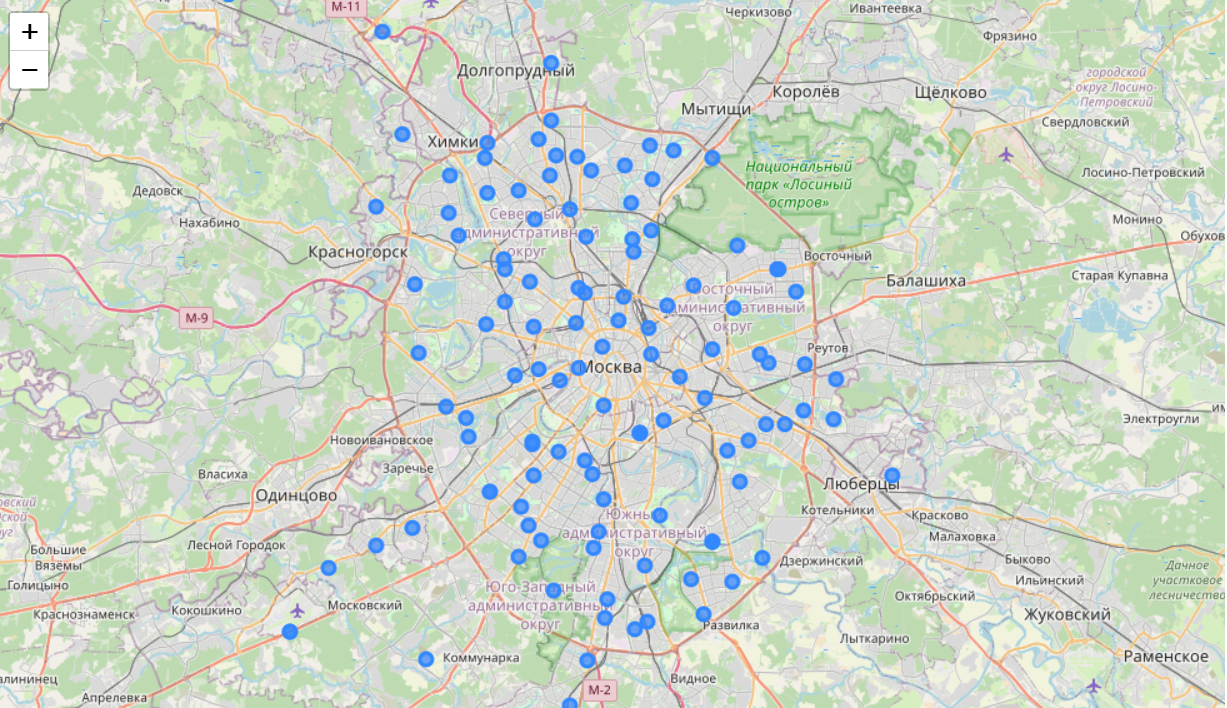

In [19]:
map_spb = folium.Map(location=spb_center.astype(float).values.tolist()[0], zoom_start=10)

markers_colors = []
for lat, lon, poi in zip(spb_neig['lat'], spb_neig['lon'], spb_neig['Neighbourhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=1,
        fill=True,
        #fill_color=1,
        fill_opacity=0.7).add_to(map_spb)
       
map_spb

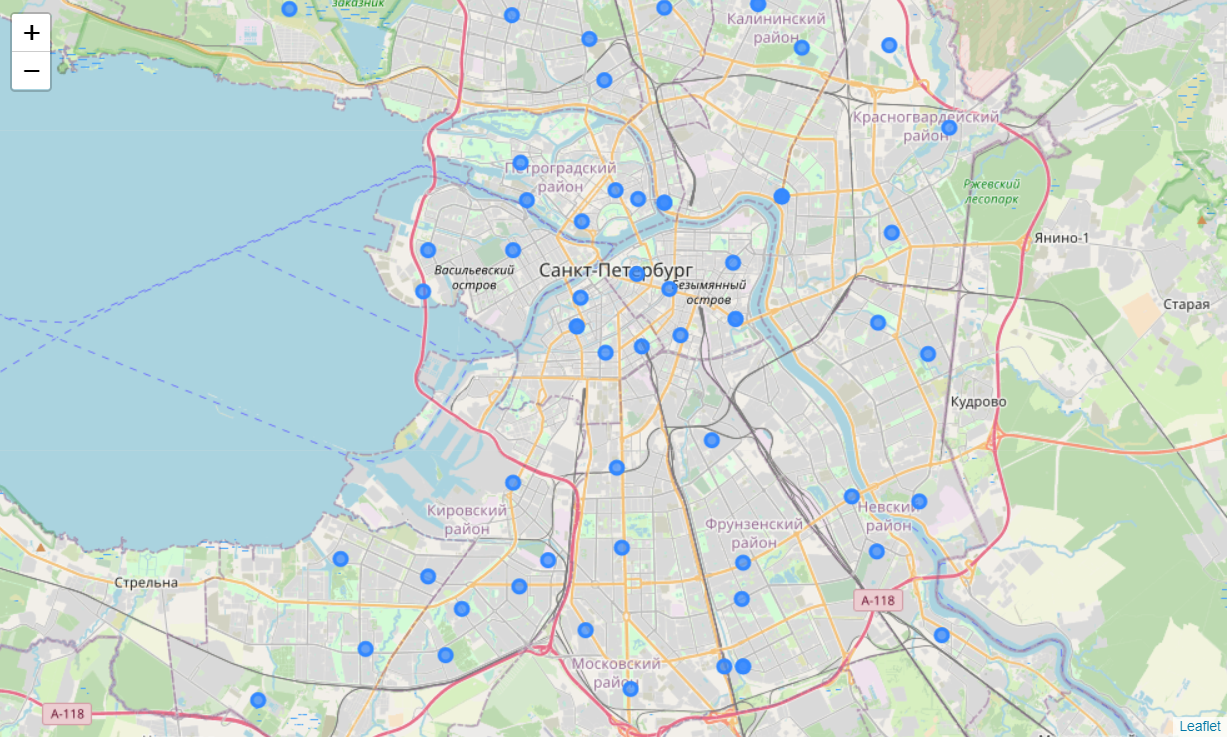

Next step is to load data from foursquare.  
Let's create a function that allow as get information about Moscow and St.Petersburg neighborhoods venues.

In [20]:
CLIENT_ID = 'ZMTK2WDYCDINQIHLP5BVTN03U1NY41AGZVIJPGDZSGPDTOPX' # your Foursquare ID
CLIENT_SECRET = '4PNTRNEXTCD53E3C0ZMWFPQP2WAU50QGQ3KF2CMUSW4COSRT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZMTK2WDYCDINQIHLP5BVTN03U1NY41AGZVIJPGDZSGPDTOPX
CLIENT_SECRET:4PNTRNEXTCD53E3C0ZMWFPQP2WAU50QGQ3KF2CMUSW4COSRT


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe for Moscow and St.Peterburg.

In [22]:
msk_venues = getNearbyVenues(names=msk['Neighbourhood'],
                                   latitudes=msk['lat'],
                                   longitudes=msk['lon']
                                  )

Академический
Алексеевский
Алтуфьевский
Арбат
Аэропорт
Бабушкинский
Басманный
Беговой
Бескудниковский
Бибирево
Бирюлёво Восточное
Бирюлёво Западное
Богородское
Братеево
Бутырский
Вешняки
Внуково
Войковский
Восточное Дегунино
Восточное Измайлово
Восточный
Выхино-Жулебино
Гагаринский
Головинский
Гольяново
Даниловский
Дмитровский
Донской
Дорогомилово
Замоскворечье
Западное Дегунино
Зюзино
Зябликово
Ивановское
Измайлово
Капотня
Коньково
Коптево
Косино-Ухтомский
Котловка
Красносельский
Крылатское
Крюково
Кузьминки
Кунцево
Куркино
Левобережный
Лефортово
Лианозово
Ломоносовский
Лосиноостровский
Люблино
Марфино
Марьина Роща
Марьино
Матушкино
Метрогородок
Мещанский
Митино
Можайский
Молжаниновский
Москворечье-Сабурово
Нагатино-Садовники
Нагатинский Затон
Нагорный
Некрасовка
Нижегородский
Новогиреево
Новокосино
Ново-Переделкино
Обручевский
Орехово-Борисово Северное
Орехово-Борисово Южное
Останкинский
Отрадное
Очаково-Матвеевское
Перово
Печатники
Покровское-Стрешнево
Преображенское
Пресненский
Про

In [25]:
spb_venues = getNearbyVenues(names=spb_neig['Neighbourhood'],
                                   latitudes=spb_neig['lat'],
                                   longitudes=spb_neig['lon']
                                  )

Автово
Адмиралтейский
Академическое
Балканский
Большая
Охта
Васильевский
Введенский
Владимирский
Волковское
Гавань
Гагаринское
Георгиевский
Горелово
Гражданка
Дачное
Дворцовый
Екатерингофский
Звёздное
Ивановский
Измайловское
Княжево
Коломна
Коломяги
Комендантский
Константиновское
Кронверкское
Купчино
Ланское
Лахта-Ольгино
Лиговка-Ямская
Литейный
Малая
Охта
Морской
Московская
Нарвский
Народный
Невский
Новоизмайловское
Обуховский
Долгое
Оккервиль
Петровский
Пискарёвка
Полюстрово
Пороховые
Посадский
Правобережный
Прометей
Пулковский
Ржевка
Рыбацкое
Сампсониевское
Светлановское
Северный
Семёновский
Сергиевское
Смольнинское
Сосновское
Ульянка
Урицк
Финляндский
Чкаловское
Шувалово-Озерки
Юго-Запад
Южно-Приморский
Юнтолово


Let's look how is data looks like.

In [23]:
msk_venues

Neighborhood  Neighborhood Latitude  \
0                 Академический              55.692091   
1                 Академический              55.692091   
2                 Академический              55.692091   
3                 Академический              55.692091   
4                 Академический              55.692091   
...                         ...                    ...   
6818  Филимонковское, поселение              55.586240   
6819       Щаповское, поселение              55.352489   
6820       Щаповское, поселение              55.352489   
6821       Щаповское, поселение              55.352489   
6822       Щаповское, поселение              55.352489   

      Neighborhood Longitude                              Venue  \
0                  37.589259                           Вкусвилл   
1                  37.589259             Парк «Новые Черёмушки»   
2                  37.589259                     Spirit Fitness   
3                  37.589259                           Подружка   
4                  37.589259                        Cats & Dogs   
...                      ...                                ...   
6818               37.265358                   Рейс 463 VKO-TJM   
6819               37.443953                      Atlantic City   
6820               37.443953                  Nikulino Village   
6821               37.443953              Магазин "Никулинский"   
6822               37.443953  Sysoev Serega 25th Birthday Party   

      Venue Latitude  Venue Longitude        Venue Category  
0          55.691800        37.588235     Health Food Store  
1          55.693547        37.589786                  Park  
2          55.690272        37.601362  Gym / Fitness Center  
3          55.690292        37.601388        Cosmetics Shop  
4          55.689592        37.601016             Pet Store  
...              ...              ...                   ...  
6818       55.593191        37.258526         Moving Target  
6819       55.355982        37.450608            Campground  
6820       55.344541        37.443891                Resort  
6821       55.344530        37.444056     Health Food Store  
6822       55.348515        37.456081           Salad Place  

[6823 rows x 7 columns]

In [26]:
spb_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          Автово              59.858637               30.278818   
1          Автово              59.858637               30.278818   
2          Автово              59.858637               30.278818   
3          Автово              59.858637               30.278818   
4          Автово              59.858637               30.278818   
...           ...                    ...                     ...   
4332     Юнтолово              60.022153               30.235951   
4333     Юнтолово              60.022153               30.235951   
4334     Юнтолово              60.022153               30.235951   
4335     Юнтолово              60.022153               30.235951   
4336     Юнтолово              60.022153               30.235951   

                             Venue  Venue Latitude  Venue Longitude  \
0                      Fitness One       59.853499        30.282053   
1                             Кода       59.852220        30.283060   
2                         Подружка       59.852164        30.273006   
3                             Лэнд       59.852476        30.281625   
4                   IMPERIAL SHOPS       59.852355        30.268517   
...                            ...             ...              ...   
4332                        Воздух       60.027077        30.224183   
4333  Остановка «Долгоозёрная ул.»       60.017072        30.248387   
4334         Зоомаркет в Юбилейном       60.030244        30.235912   
4335                      Продукты       60.030493        30.237980   
4336          Булочная Ф. Вольчека       60.030578        30.238352   

            Venue Category  
0     Gym / Fitness Center  
1             Dance Studio  
2           Cosmetics Shop  
3            Grocery Store  
4                 Boutique  
...                    ...  
4332           Yoga Studio  
4333              Bus Stop  
4334             Pet Store  
4335     Convenience Store  
4336                Bakery  

[4337 rows x 7 columns]

So, we have insights in a data, next step is to analyse neighbourhoods and find out similar clusters in to cities.

## Exploratory data analysis

Let's find out how many unique categories can be curated from all the returned venues

In [27]:
print('There are {} uniques categories in Moscow.'.format(len(msk_venues['Venue Category'].unique())))
print('There are {} uniques categories in St.Peterburg.'.format(len(spb_venues['Venue Category'].unique())))

There are 369 uniques categories in Moscow.
There are 331 uniques categories in St.Peterburg.


Then find most frequent categories for each neighbourhoods

In [28]:
# one hot encoding
msk_onehot = pd.get_dummies(msk_venues[['Venue Category']], prefix="", prefix_sep="")
spb_onehot = pd.get_dummies(spb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
msk_onehot['Neighborhood'] = msk_venues['Neighborhood']
spb_onehot['Neighborhood'] = spb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [msk_onehot.columns[-1]] + list(msk_onehot.columns[:-1])
msk_onehot = msk_onehot[fixed_columns]
fixed_columns = [spb_onehot.columns[-1]] + list(spb_onehot.columns[:-1])
spb_onehot = spb_onehot[fixed_columns]

msk_onehot.tail()

Neighborhood  ATM  Accessories Store  Adult Boutique  \
6818  Филимонковское, поселение    0                  0               0   
6819       Щаповское, поселение    0                  0               0   
6820       Щаповское, поселение    0                  0               0   
6821       Щаповское, поселение    0                  0               0   
6822       Щаповское, поселение    0                  0               0   

      American Restaurant  Arcade  Arepa Restaurant  Art Gallery  Art Museum  \
6818                    0       0                 0            0           0   
6819                    0       0                 0            0           0   
6820                    0       0                 0            0           0   
6821                    0       0                 0            0           0   
6822                    0       0                 0            0           0   

      Arts & Crafts Store  ...  Water Park  Waterfront  Whisky Bar  Wine Bar  \
6818                    0  ...           0           0           0         0   
6819                    0  ...           0           0           0         0   
6820                    0  ...           0           0           0         0   
6821                    0  ...           0           0           0         0   
6822                    0  ...           0           0           0         0   

      Wine Shop  Wings Joint  Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
6818          0            0              0            0    0            0  
6819          0            0              0            0    0            0  
6820          0            0              0            0    0            0  
6821          0            0              0            0    0            0  
6822          0            0              0            0    0            0  

[5 rows x 370 columns]

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
msk_grouped = msk_onehot.groupby('Neighborhood').mean().reset_index()
msk_grouped.head()
spb_grouped = spb_onehot.groupby('Neighborhood').mean().reset_index()
spb_grouped.head()

Neighborhood       ATM  Accessories Store  Adult Boutique  \
0          Автово  0.000000                0.0             0.0   
1  Адмиралтейский  0.000000                0.0             0.0   
2   Академическое  0.000000                0.0             0.0   
3      Балканский  0.011905                0.0             0.0   
4         Большая  0.000000                0.0             0.0   

   Advertising Agency  American Restaurant  Antique Shop  Aquarium    Arcade  \
0                 0.0                  0.0           0.0       0.0  0.000000   
1                 0.0                  0.0           0.0       0.0  0.010000   
2                 0.0                  0.0           0.0       0.0  0.013514   
3                 0.0                  0.0           0.0       0.0  0.000000   
4                 0.0                  0.0           0.0       0.0  0.000000   

   Art Gallery  ...  Watch Shop  Water Park  Waterfront  Wine Bar  Wine Shop  \
0         0.00  ...         0.0         0.0        0.00      0.00   0.027778   
1         0.01  ...         0.0         0.0        0.01      0.01   0.000000   
2         0.00  ...         0.0         0.0        0.00      0.00   0.027027   
3         0.00  ...         0.0         0.0        0.00      0.00   0.000000   
4         0.00  ...         0.0         0.0        0.00      0.00   0.028169   

     Winery  Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0  0.000000       0.000000     0.000000  0.0          0.0  
1  0.000000       0.000000     0.000000  0.0          0.0  
2  0.000000       0.013514     0.000000  0.0          0.0  
3  0.000000       0.011905     0.000000  0.0          0.0  
4  0.014085       0.000000     0.014085  0.0          0.0  

[5 rows x 332 columns]

Let's get top most venues for each neighborhood into a pandas dataframe

In [30]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe for Moscow
msk_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
msk_neighborhoods_venues_sorted['Neighborhood'] = msk_grouped['Neighborhood']

for ind in np.arange(msk_grouped.shape[0]):
    msk_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(msk_grouped.iloc[ind, :], num_top_venues)

msk_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Академический                Bakery                  Park   
1   Алексеевский           Pizza Place           Coffee Shop   
2   Алтуфьевский           Supermarket     Convenience Store   
3          Арбат           Coffee Shop                 Hotel   
4       Аэропорт        Cosmetics Shop           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop  Gym / Fitness Center              Pharmacy   
1             Pet Store  Caucasian Restaurant                  Park   
2           Zoo Exhibit         Auto Workshop              Bus Stop   
3           Yoga Studio                Museum    Russian Restaurant   
4                  Café     Convenience Store              Pharmacy   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Supermarket     Health Food Store             Bookstore   
1                 Hotel           Supermarket        Massage Studio   
2          Burger Joint                  Café     Food & Drink Shop   
3           Flower Shop   Sporting Goods Shop                Bakery   
4                Bakery                  Park  Gym / Fitness Center   

  9th Most Common Venue 10th Most Common Venue  
0        Clothing Store             Baby Store  
1                   Spa             Smoke Shop  
2         Grocery Store   Gym / Fitness Center  
3    Salon / Barbershop             Restaurant  
4     Food & Drink Shop              Pet Store

In [32]:
# create a new dataframe for St.Peterburg
spb_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
spb_neighborhoods_venues_sorted['Neighborhood'] = spb_grouped['Neighborhood']

for ind in np.arange(spb_grouped.shape[0]):
    spb_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(spb_grouped.iloc[ind, :], num_top_venues)

spb_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue   2nd Most Common Venue  \
0          Автово  Gym / Fitness Center  Furniture / Home Store   
1  Адмиралтейский                 Hotel              Restaurant   
2   Академическое                Bakery            Dessert Shop   
3      Балканский        Clothing Store       Mobile Phone Shop   
4         Большая                Bakery                    Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Pharmacy          Dance Studio         Auto Workshop   
1                   Bar                  Park          Concert Hall   
2  Gym / Fitness Center            Playground              Bus Stop   
3         Shopping Mall        Shawarma Place  Gym / Fitness Center   
4            Playground              Pharmacy           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Restaurant              Boutique     Electronics Store   
1           Opera House  Caucasian Restaurant                 Plaza   
2   Sporting Goods Shop     Outdoor Sculpture          Gourmet Shop   
3     Electronics Store  Fast Food Restaurant           Flower Shop   
4             Pet Store           Flower Shop            Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0           Blini House             Smoke Shop  
1        History Museum      Indian Restaurant  
2             Gastropub            Pizza Place  
3             Multiplex                 Bakery  
4             Wine Shop      Convenience Store

## Cluster Neighborhoods
Run k-means to cluster the Moscow neighborhoods into some number of clusters.

In [33]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

Fisrt of all let's leave the same venues that can be found in Moscow an St.Petersburg.

In [94]:
same_names= list(set(list(spb_grouped.drop('Neighborhood', 1))) & set(msk_grouped.drop('Neighborhood', 1)))
len(same_names)

280

And after that get the Moscow Clusters

In [90]:
# set number of clusters
kclusters = 4

msk_grouped_clustering = msk_grouped[same_names]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(msk_grouped_clustering)

# add clustering labels
# msk_neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
msk_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
print (unique, counts)

[0 1 2 3] [28  5 60 39]


In [91]:
msk_neighborhoods_venues_sorted.head()

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               2  Академический                Bakery                  Park   
1               3   Алексеевский           Pizza Place           Coffee Shop   
2               0   Алтуфьевский           Supermarket     Convenience Store   
3               3          Арбат           Coffee Shop                 Hotel   
4               2       Аэропорт        Cosmetics Shop           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop  Gym / Fitness Center              Pharmacy   
1             Pet Store  Caucasian Restaurant                  Park   
2           Zoo Exhibit         Auto Workshop              Bus Stop   
3           Yoga Studio                Museum    Russian Restaurant   
4                  Café     Convenience Store              Pharmacy   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Supermarket     Health Food Store             Bookstore   
1                 Hotel           Supermarket        Massage Studio   
2          Burger Joint                  Café     Food & Drink Shop   
3           Flower Shop   Sporting Goods Shop                Bakery   
4                Bakery                  Park  Gym / Fitness Center   

  9th Most Common Venue 10th Most Common Venue  
0        Clothing Store             Baby Store  
1                   Spa             Smoke Shop  
2         Grocery Store   Gym / Fitness Center  
3    Salon / Barbershop             Restaurant  
4     Food & Drink Shop              Pet Store

Let's visualize clusters

In [92]:
msk_merged= pd.merge(msk.rename(columns = {'Neighbourhood':'Neighborhood'}), msk_neighborhoods_venues_sorted, on="Neighborhood")
msk_merged.head(3)

Borough   Neighborhood Distict        lat        lon  Cluster Labels  \
0  Академический  Академический    ЮЗАО  55.692091  37.589259               2   
1   Алексеевский   Алексеевский    СВАО  55.821456  37.643961               3   
2   Алтуфьевский   Алтуфьевский    СВАО  55.880255  37.581635               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                Bakery                  Park           Coffee Shop   
1           Pizza Place           Coffee Shop             Pet Store   
2           Supermarket     Convenience Store           Zoo Exhibit   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Gym / Fitness Center              Pharmacy           Supermarket   
1  Caucasian Restaurant                  Park                 Hotel   
2         Auto Workshop              Bus Stop          Burger Joint   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Health Food Store             Bookstore        Clothing Store   
1           Supermarket        Massage Studio                   Spa   
2                  Café     Food & Drink Shop         Grocery Store   

  10th Most Common Venue  
0             Baby Store  
1             Smoke Shop  
2   Gym / Fitness Center

In [106]:
# create map
map_msk_clusters = folium.Map(location=msk_center.astype(float).values.tolist()[0], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, v1, v2, v3 in zip(msk_merged['lat'], msk_merged['lon'], msk_merged['Neighborhood'], msk_merged['Cluster Labels'], 
                                              msk_merged['1st Most Common Venue'], msk_merged['2nd Most Common Venue'], msk_merged['3rd Most Common Venue']):
    label = folium.Popup( poi + ' Cluster ' + str(cluster) +' top ven: ' + str(v1) +', ' + str(v2) +', ' + str(v3) +', ', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_msk_clusters)
       
map_msk_clusters


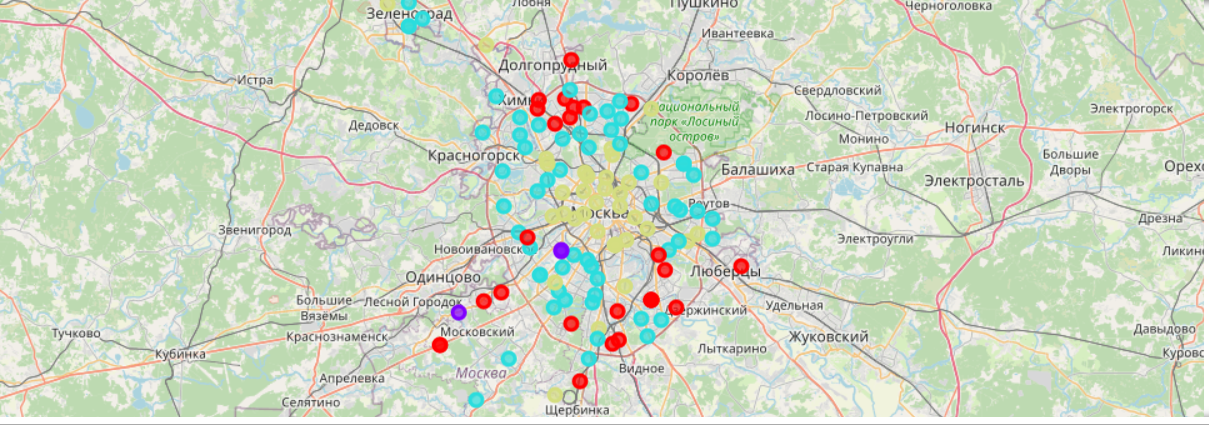

And than let's predict same clusters in St.Petersbug and plot it on the map.

In [98]:
spb_clustering = kmeans.predict(spb_grouped[same_names])

# add clustering labels
#spb_neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
spb_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', spb_clustering)

unique, counts = np.unique(spb_clustering, return_counts=True)
print (unique, counts)

[0 2 3] [ 2 34 31]


In [103]:
spb_merged= pd.merge(spb_neig.rename(columns = {'Neighbourhood':'Neighborhood'}), spb_neighborhoods_venues_sorted, on="Neighborhood")
spb_merged.head(3)

Neighborhood        lat        lon  Cluster Labels 1st Most Common Venue  \
0          Автово  59.858637  30.278818               2  Gym / Fitness Center   
1  Адмиралтейский  59.931054  30.296798               3                 Hotel   
2   Академическое  60.011526  30.394661               2                Bakery   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0  Furniture / Home Store              Pharmacy          Dance Studio   
1              Restaurant                   Bar                  Park   
2            Dessert Shop  Gym / Fitness Center            Playground   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Auto Workshop            Restaurant              Boutique   
1          Concert Hall           Opera House  Caucasian Restaurant   
2              Bus Stop   Sporting Goods Shop     Outdoor Sculpture   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0     Electronics Store           Blini House             Smoke Shop  
1                 Plaza        History Museum      Indian Restaurant  
2          Gourmet Shop             Gastropub            Pizza Place

In [105]:
# create map
map_spb_clusters = folium.Map(location=spb_center.astype(float).values.tolist()[0], zoom_start=10)

# set color scheme for the clusters
#x = np.arange(spb_clustering)
#ys = [i + x + (i*x)**2 for i in range(spb_clustering)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, v1, v2, v3 in zip(spb_merged['lat'], msk_merged['lon'], spb_merged['Neighborhood'], spb_merged['Cluster Labels'], 
                                              spb_merged['1st Most Common Venue'], spb_merged['2nd Most Common Venue'], spb_merged['3rd Most Common Venue']):
    label = folium.Popup( poi + ' Cluster ' + str(cluster) +' top ven: ' + str(v1) +', ' + str(v2) +', ' + str(v3) +', ', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_spb_clusters)
       
map_spb_clusters

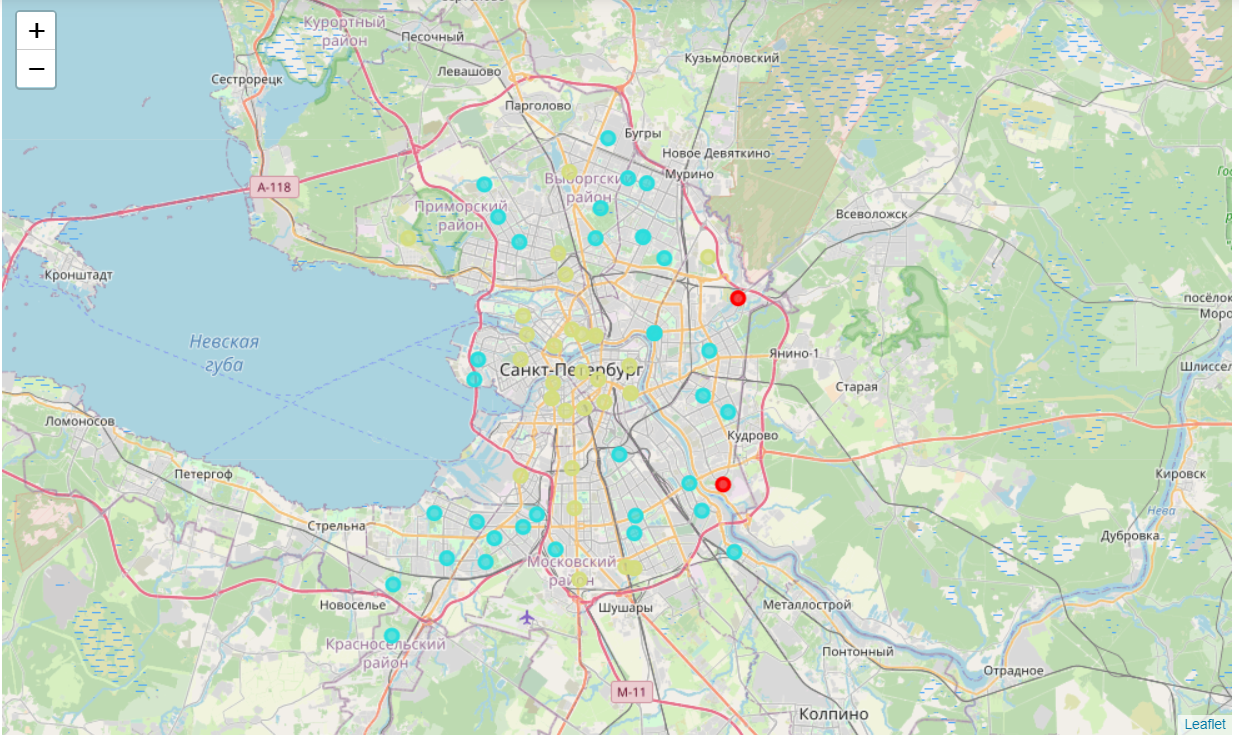

## Conclusions and recommendations

So,
1. We managed to collect information about the coordinates of the districts of the two cities, for subsequent comparison.
2. Collect POI data and statistics for each area using Foursquare.
3. Conduct clustering of one area and determine the closest and most distant areas in terms of POI composition.
4. Mark out the districts of another city based on the proximity to one of the clusters of the first.

A person who is going to move from Moscow to St. Petersburg can now identify preferred districts in a familiar city and identify similar ones to this district in another city.

As a direction for the development of this topic, we can propose a statistical study of clusters and the interpretation of statistics in the form of a description of the properties of a cluster in terms that are understandable to the layman. This will allow you to explore areas not only by statistical similarity, but to form expectations based on a readable description of the properties of the area or cluster. 